## In this notebook, I will replicate vision transformer and use it to classify food images.

The paper for the vision transformer is as follows:
<a>https://arxiv.org/abs/2010.11929</a>

In [18]:
import torch
from torch import nn
import numpy as np
import pandas as pd

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import matplotlib.pyplot as plt




In [3]:
# Get helper functions for plotting
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn, download_data  # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classe

### 1. Setup Data

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [8]:
train_dir = image_path/ 'train'
test_dir = image_path/ 'test'

##### 1.1 Load the data into train and test sets

In [12]:
# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

manual_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor()
])

In [14]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=manual_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=manual_transform)

In [15]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=1)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=1)

In [17]:
class_names = train_dataset.classes
class_names_indexes = train_dataset.class_to_idx

class_names

['pizza', 'steak', 'sushi']

##### 1.2 visualise a single image

In [22]:
# visualising image from dataset
image, label = train_dataset[0]

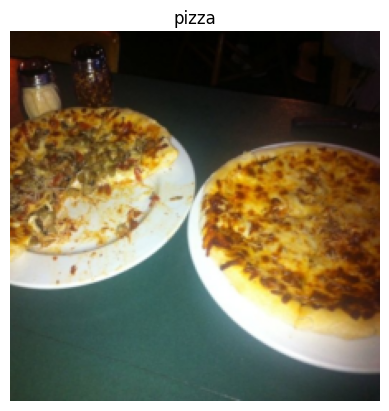

In [28]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

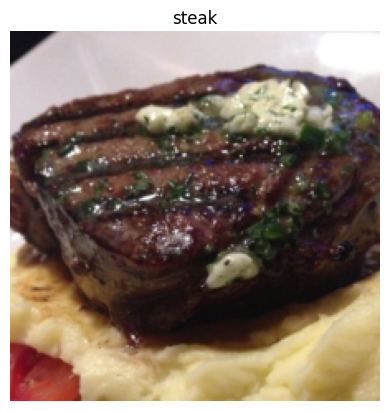

In [31]:
# visualise image from dataloader
image_batch, label_batch = next(iter(train_dataloader))

image_dataloader, label_dataloader = image_batch[0], label_batch[0]

plt.imshow(image_dataloader.permute(1,2,0))
plt.title(class_names[label_dataloader])
plt.axis(False);


**Looks like the data is loading perfectly!**